<a href="https://colab.research.google.com/github/chengc843988/fcu-python3/blob/main/colab-cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

導入相關的PACKAGE
1. cv2: opencv, 圖型處理軟體
2. numpy: 數學運算工具, 矩陣運算, 
3. matplotlib: 簡寫, plt, 繪圖, 表格等...


In [1]:
import cv2
cv2.__version__


'4.6.0'

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from numpy.lib.stride_tricks import as_strided
from skimage import io



CNN,影像POOL化...計算特徵矩陣

In [3]:

def pool2d(A, kernel_size, stride, padding, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    # Padding
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size)//stride + 1,
                    (A.shape[1] - kernel_size)//stride + 1)
    kernel_size = (kernel_size, kernel_size)
    A_w = as_strided(A, shape=output_shape + kernel_size,
                     strides=(stride*A.strides[0],
                              stride*A.strides[1]) + A.strides)
    A_w = A_w.reshape(-1, *kernel_size)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(1, 2)).reshape(output_shape)
    elif pool_mode == 'avg':
        return A_w.mean(axis=(1, 2)).reshape(output_shape)


CNN,影像POOL化...計算特徵矩陣

In [4]:

def pooling(feature_map, size=2, stride=2):
    print(feature_map.shape, feature_map.dtype)
    # Preparing the output of the pooling operation.
    # pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride),
    #                         np.uint16((feature_map.shape[1]-size+1)/stride),
    #                         feature_map.shape[-1]))

    pool_out = np.zeros((np.uint8((feature_map.shape[0]-size+1)/stride),
                         np.uint8((feature_map.shape[1]-size+1)/stride),
                         feature_map.shape[-1]))

    # print("feature map:",feature_map.shape[-1])
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        # print("feature map:",feature_map.shape[0]-size-1)
        for r in np.arange(0, feature_map.shape[0]-size-1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size-1, stride):
                pool_out[r2, c2, map_num] = np.max(
                    feature_map[r:r+size,  c:c+size, map_num])-150
                c2 = c2 + 1
            r2 = r2 + 1
    return pool_out


In [13]:
# https://github.com/chengc843988/fcu-python3/blob/main/cv2/lina-1.jpg

!curl -o 'lina-1.jpg' "https://github.com/chengc843988/fcu-python3/blob/main/cv2/lina-1.jpg?raw=true"
#import cv2
#img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)
url='https://github.com/chengc843988/fcu-python3/blob/main/cv2/lina-1.jpg?raw=true'

#img = cv2.imread('lina-1.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show img data content
img = io.imread(url)
# print(type(img))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
<class 'numpy.ndarray'>


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]] 25.0
[[ 2.  2.  2.]
 [-2. -2. -2.]
 [ 0.  0.  0.]] 0.0
(188, 268, 3) uint8
(188, 268, 3) uint8
(188, 268, 3) (46, 66, 3)
[[[225 193 178]
  [224 192 177]
  [221 189 176]
  [225 193 180]]

 [[221 188 171]
  [221 188 171]
  [221 188 173]
  [223 189 177]]

 [[236 201 182]
  [231 196 177]
  [223 187 171]
  [221 185 171]]

 [[219 181 162]
  [236 198 179]
  [240 201 184]
  [229 187 173]]]
[90. 51. 34.]


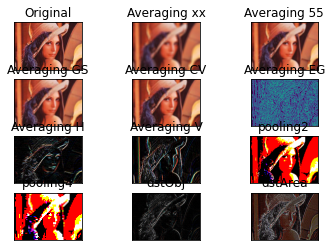

In [14]:
# https://github.com/chengc843988/fcu-python3/blob/main/cv2/lina-1.jpg

!curl -o lina-1.jpg https://github.com/chengc843988/fcu-python3/blob/main/cv2/lina-1.jpg?raw=true
#import cv2
#img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)

#img = cv2.imread('lina-1.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 將 BGR 圖片轉為 RGB 圖片
#img_rgb = img_bgr[:,:,::-1]
# 或是這樣亦可
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


# 5*5 average
kernel55 = np.ones((5, 5), np.float32)/25
kernelxx = np.ones((10, 10), np.float32)/100

conv = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
], dtype=np.float32)

convSum = np.sum(conv)
conv = conv/convSum
print(conv, convSum)

# convH=np.array([
#     [0,0,0,0,0],
#     [0,0,0,0,0],
#     [1,1,1,1,1],
#     [0,0,0,0,0],
#     [0,0,0,0,0]
# ],dtype=np.float32)

convH = np.array([
    [2, 2, 2],
    [-2, -2, -2],
    [0, 0, 0]
], dtype=np.float32)
convV = np.array([
    [0, 2, -2],
    [0, 2, -2],
    [0, 2, -2]
], dtype=np.float32)


convObj = np.array([
    [-1, -1,2],
    [-1, 2, -1],
    [2, -1, -1]

], dtype=np.float32)
# convObj = convObj/np.sum(convObj)

convArea = np.array([
    [-1, -1,-1],
    [-1, 8.3, -1],
    [-1, -1, -1]

], dtype=np.float32)



convHSum = np.sum(convH)
# convH = convH/convSum
print(convH, convHSum)


dst55 = cv2.filter2D(img, -1, kernel55)
dstxx = cv2.filter2D(img, -1, kernelxx)
dstGS = cv2.GaussianBlur(img, (7, 7), 0)
dstEG = cv2.Canny(img, 2, 2)
dstConv = cv2.filter2D(img, -1, conv)
dstConvH = cv2.filter2D(img, -1, convH)
dstConvV = cv2.filter2D(img, -1, convV)
dstObj = cv2.filter2D(img, -1, convObj)
dstArea = cv2.filter2D(img, -1, convArea)


# dstPool2 = pool2d(img[:, :, 0], 2, 2, 0)
# w = dstPool2.shape[0]
# h = dstPool2.shape[1]
# print(w, h, dstPool2.shape)


# dstPool2 = np.append(dstPool2, pool2d(img[:, :, 1], 2, 2, 0))
# print(w, h, dstPool2.shape)
# dstPool2 = np.append(dstPool2, pool2d(img[:, :, 2], 2, 2, 0))
# print(w, h, dstPool2.shape)
# dstPool2 = dstPool2.reshape([w, h, 3])

# dstPool4 = pool2d(img[:, :, 0], 4, 4, 0)
# w = dstPool4.shape[0]
# h = dstPool4.shape[1]
# dstPool4 = np.append(dstPool4, pool2d(img[:, :, 1], 4, 4, 0))
# dstPool4 = np.append(dstPool4, pool2d(img[:, :, 2], 4, 4, 0))
# dstPool4 = dstPool4.reshape([w, h, 3])
# print(dstPool4.shape)


dstPool2 = pooling(img, 2, 2)
dstPool4 = pooling(img, 4, 4)
# print(w, h, dstPool2.shape)
# print(w, h, dstPool4.shape)

# for i in range(w-1):
#     for j in range(h-1):
#         print(dstPool4[i,j,0],dstPool4[i,j,1],dstPool4[i,j,2])
print(img.shape, dstPool4.shape)
print(img[40:44, 176:180])
print(dstPool4[10, 44])
r = 4
c = 3

plt.subplot(r, c, 1), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(r, c, 2), plt.imshow(dstxx), plt.title('Averaging xx')
plt.xticks([]), plt.yticks([])
plt.subplot(r, c, 3), plt.imshow(dst55), plt.title('Averaging 55')
plt.xticks([]), plt.yticks([])
plt.subplot(r, c, 4), plt.imshow(dstGS), plt.title('Averaging GS')
plt.xticks([]), plt.yticks([])
plt.subplot(r, c, 5), plt.imshow(dstConv), plt.title('Averaging CV')
plt.xticks([]), plt.yticks([])
plt.subplot(r, c, 6), plt.imshow(dstEG), plt.title('Averaging EG')
plt.xticks([]), plt.yticks([])
plt.subplot(r, c, 7), plt.imshow(dstConvH), plt.title('Averaging H')
plt.xticks([]), plt.yticks([])
plt.subplot(r, c, 8), plt.imshow(dstConvV), plt.title('Averaging V')
plt.xticks([]), plt.yticks([])

plt.subplot(r, c, 9), plt.imshow(dstPool2), plt.title('pooling2')
plt.xticks([]), plt.yticks([])

plt.subplot(r, c, 10), plt.imshow(dstPool4), plt.title('pooling4')
plt.xticks([]), plt.yticks([])


plt.subplot(r, c, 11), plt.imshow(dstObj), plt.title('dstObj')
plt.xticks([]), plt.yticks([])

plt.subplot(r, c, 12), plt.imshow(dstArea), plt.title('dstArea')
plt.xticks([]), plt.yticks([])

plt.show()

